In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0


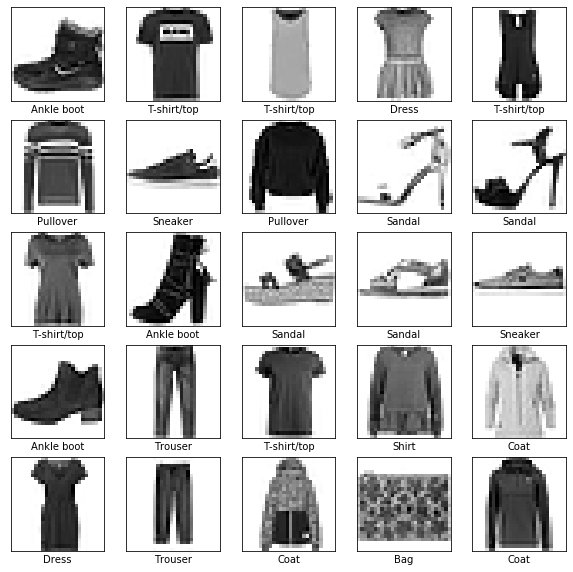

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1009 - accuracy: 0.9612
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0966 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0951 - accuracy: 0.9653
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0940 - accuracy: 0.9647
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0936 - accuracy: 0.9646
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0909 - accuracy: 0.9653
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0902 - accuracy: 0.9658
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0889 - accuracy: 0.9663
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0869 - accuracy: 0.9668
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.086

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.5266 - accuracy: 0.8820

Test accuracy: 0.8820000290870667


In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [12]:
predictions = probability_model.predict(test_images)


In [13]:
predictions[0]


array([7.0153129e-07, 3.8181733e-09, 6.9787419e-08, 3.6619122e-10,
       3.6798858e-06, 5.0798315e-04, 6.3751366e-07, 1.8272767e-02,
       4.2762722e-06, 9.8120993e-01], dtype=float32)

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


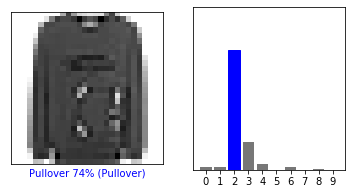

In [16]:
i = 46
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


In [17]:
img = test_images[i]

print(img.shape)



(28, 28)


In [18]:
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [19]:
predictions_single = probability_model.predict(img)

print(predictions_single)


[[1.7418914e-02 1.7026816e-02 7.3597419e-01 1.7066291e-01 3.5145096e-02
  6.4960932e-11 2.0205155e-02 4.7056130e-11 3.5666905e-03 1.8381111e-07]]


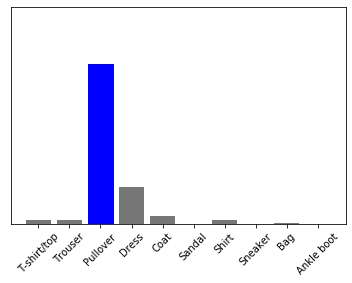

In [20]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [21]:
np.argmax(predictions_single[0])


2